# SVM model for classification minst dataset
--------------------------------------------
## This is a [Kaggle](https://www.kaggle.com/competitions/digit-recognizer/) problem

Made by [Romain Dodet](https://linkedin.com/in/Romain-Dodet)

This code has been made with the original code by [Ryan Li](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-support-vector-machine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

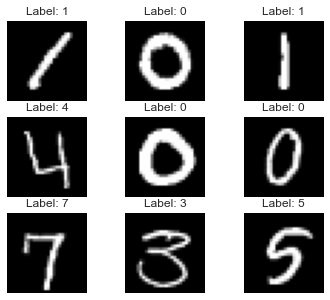

In [3]:
# Visualizing the data as images
plt.figure(figsize=(6,5))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    plt.title('Label: {}'.format(train.iloc[i, 0]))
    plt.axis('off')
plt.show()

In [4]:
# Splitting the dataset into the Training set and Test set
X_train = train[train.columns[1:]]
y_train = train[train.columns[0]]
X_test = test

(42000, 784) (42000,) (28000, 784)


In [5]:
# Preprocessing the data: Feature Scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Ok')

Ok


In [ ]:
# Create the SVM model
params = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(), params, refit=True, verbose=3)
grid.fit(X_train, y_train)
print('Ok')

In [ ]:
# Predicting the Test set results
y_pred = grid.predict(X_test)

In [ ]:
# Visualizing the results with a confusion matrix
cm = confusion_matrix(y_pred, y_train)
print(cm)

sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Plotting the accuracy of the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
# Plotting the classification report
print(classification_report(y_test, y_pred))

In [ ]:
# Visualizing the result
plt.figure(figsize=(6,5))
plt.clf()
plt.plot(X_test, y_test)

In [ ]:
# Save the results in a csv file
submission = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission.to_csv('submissions/submission_SVM.csv', index=False)